In [66]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from category_encoders.target_encoder import TargetEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
import warnings
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
warnings.filterwarnings('ignore')

In [68]:
pd.set_option('display.max_columns', None)

In [69]:
dataset_teste = pd.read_csv('dataset_teste.csv')

In [70]:
dataset_teste.isnull().sum()

Phone_service                              0
Multiple_Lines                             0
Internet_Service                           0
Internet_Type                              0
Online_Security                            0
Online_Backup                              0
Device_Protection_Plan                     0
Premium_Tech_Support                       0
Streaming_TV                               0
Streaming_Movies                           0
Streaming_Music                            0
Unlimited_Data                             0
Contract                                   0
Paperless_Billing                          0
Payment_Method                             0
Age_s                                      0
Number_Dependents_s                        0
Number_Referrals_s                         0
Tenure_s                                   0
Average_Monthly_Long_Distance_Charges_s    0
Average_Monthly_GB_Download_s              0
Monthly_Charge_s                           0
Total_Char

In [71]:
dataset_treino = pd.read_csv('dataset_treinamento.csv')

In [72]:
dataset_treino.head()

,Phone_service,Multiple_Lines,Internet_Service,Internet_Type,Online_Security,Online_Backup,Device_Protection_Plan,Premium_Tech_Support,Streaming_TV,Streaming_Movies,Streaming_Music,Unlimited_Data,Contract,Paperless_Billing,Payment_Method,Age_s,Number_Dependents_s,Number_Referrals_s,Tenure_s,Average_Monthly_Long_Distance_Charges_s,Average_Monthly_GB_Download_s,Monthly_Charge_s,Total_Charges_s,Total_Refunds_s,Total_Extra_Data_Charges_s,Total_Long_Distance_Charges_s,Churn
0,Yes,Yes,Yes,Fiber Optic,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Credit Card,0.196721,0.000000,0.0,0.774648,0.760104,0.265060,0.078737,0.0,0.0,0.0,0.004366,0
1,Yes,Yes,Yes,DSL,No,No,No,Yes,No,Yes,Yes,Yes,Month-to-Month,No,Bank Withdrawal,0.032787,0.000000,0.4,0.915493,0.000000,0.807229,0.537684,0.0,0.0,0.0,0.000628,0
2,Yes,No,Yes,Cable,Yes,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Mailed Check,0.360656,0.166667,0.0,0.154930,0.000000,0.325301,0.588211,0.0,0.0,0.0,0.091850,0
3,Yes,Yes,Yes,Fiber Optic,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,0.377049,0.000000,0.1,0.957746,0.000000,0.301205,0.875368,0.0,0.0,0.0,0.006243,1
4,Yes,Yes,Yes,Fiber Optic,Yes,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,0.213115,0.000000,0.0,0.788732,0.000000,0.168675,0.198653,0.0,0.0,0.0,0.196466,0


In [73]:
X_train = dataset_treino.drop(['Churn'],axis=1)
y_train = dataset_treino[['Churn']]
X_test = dataset_teste.drop(['Churn'],axis=1)
y_test = dataset_teste[['Churn']]

In [74]:
columns_to_encoder=['Phone_service', 'Multiple_Lines', 'Internet_Service', 'Internet_Type',
       'Online_Security', 'Online_Backup', 'Device_Protection_Plan',
       'Premium_Tech_Support', 'Streaming_TV', 'Streaming_Movies',
       'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
       'Payment_Method']

In [24]:
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


list_models = [XGBClassifier, LogisticRegression, RandomForestClassifier]

preprocessor = ColumnTransformer(
            transformers=[('cat', OneHotEncoder(drop='first'), columns_to_encoder)],
            remainder='passthrough')

for model in list_models:
    print(model)

    if model == LogisticRegression:  
        params = {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]}
        
    if model == RandomForestClassifier:
        params = {'classifier__n_estimators': [50, 100],
                  'classifier__max_depth': [4, 8]}
        
    if model == XGBClassifier:
        params = {'classifier__n_estimators': [50, 100],
                      'classifier__max_depth': [4, 6]}
    
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', model())])

    grid_search = GridSearchCV(pipeline, param_grid=params, cv=5, scoring='recall')
    grid_search.fit(X_train, y_train)
    predict_test = grid_search.predict(X_test) 
     
    print(model)
    print("Metrics:")
    print(classification_report(y_true = y_test, y_pred = predict_test))

<class 'xgboost.sklearn.XGBClassifier'>
<class 'xgboost.sklearn.XGBClassifier'>
Metrics:
              precision    recall  f1-score   support

           0       0.89      0.74      0.81       639
           1       0.62      0.81      0.70       328

    accuracy                           0.77       967
   macro avg       0.75      0.78      0.76       967
weighted avg       0.80      0.77      0.77       967

<class 'sklearn.linear_model._logistic.LogisticRegression'>
<class 'sklearn.linear_model._logistic.LogisticRegression'>
Metrics:
              precision    recall  f1-score   support

           0       0.90      0.73      0.81       639
           1       0.61      0.84      0.71       328

    accuracy                           0.77       967
   macro avg       0.76      0.78      0.76       967
weighted avg       0.80      0.77      0.77       967

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
Metrics:
   

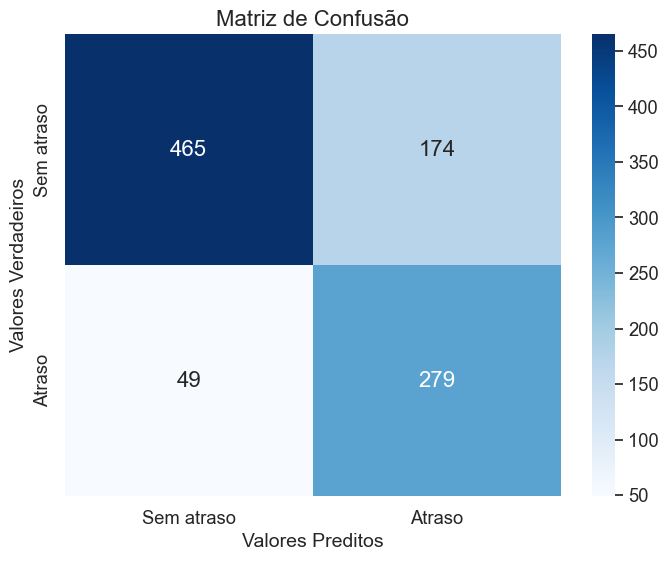

In [25]:
cm = confusion_matrix(y_test, predict_test)

# Plotar a matriz de confusão do Random Forest
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Ajusta o tamanho da fonte
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16}, 
            xticklabels=['Sem atraso', 'Atraso'], 
            yticklabels=['Sem atraso', 'Atraso'])
plt.xlabel('Valores Preditos', fontsize=14)
plt.ylabel('Valores Verdadeiros', fontsize=14)
plt.title('Matriz de Confusão', fontsize=16)
plt.show()

In [160]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

preprocessor = ColumnTransformer(
    remainder='passthrough',
    transformers=[
        ('cat', OneHotEncoder(),
         columns_to_encoder)
    ])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(sampling_strategy='minority',random_state=42, n_jobs=-1)),
    ('classifier', RandomForestClassifier())
])

params = {
    'classifier__n_estimators': [50],
    'classifier__max_depth': [4],
    'classifier__warm_start': [True],
    'classifier__min_samples_split': [90],
    'classifier__min_samples_leaf': [2]
}
    
# Instancie o objeto GridSearchCV com o pipeline
grid_search = GridSearchCV(estimator=pipeline, param_grid=params, cv=kf, n_jobs=-1,scoring='recall')


grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OneHotEncoder(),
                                                                         ['Phone_service',
                                                                          'Multiple_Lines',
                                                                          'Internet_Service',
                                                                          'Internet_Type',
                                                                          'Online_Security',
                                                                          'Online_Backup',
                                                                          'Device_Protection_Plan',
                                                                          'Premium_Tech_Support',
                                                                          'Streaming_TV',...
                                                                          'Paperless_Billing',
                                                                          'Payment_Method'])])),
                                       ('smote',
                                        SMOTE(n_jobs=-1, random_state=42,
                                              sampling_strategy='minority')),
                                       ('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [4],
                         'classifier__min_samples_leaf': [2],
                         'classifier__min_samples_split': [90],
                         'classifier__n_estimators': [50],
                         'classifier__warm_start': [True, False]},
             scoring='recall')

In [162]:
grid_search.best_params_

{'classifier__max_depth': 4,
 'classifier__min_samples_leaf': 2,
 'classifier__min_samples_split': 90,
 'classifier__n_estimators': 50,
 'classifier__warm_start': True}

In [161]:
best_model = grid_search.best_estimator_
predict_test = best_model.predict(X_test) 

print("Metrics:")
print(classification_report(y_true = y_test, y_pred = predict_test))

Metrics:
              precision    recall  f1-score   support

           0       0.90      0.73      0.80       639
           1       0.61      0.84      0.71       328

    accuracy                           0.77       967
   macro avg       0.76      0.78      0.76       967
weighted avg       0.80      0.77      0.77       967



In [65]:
import joblib
joblib.dump(best_model, 'modelo_treinado.joblib')

['modelo_treinado.joblib']

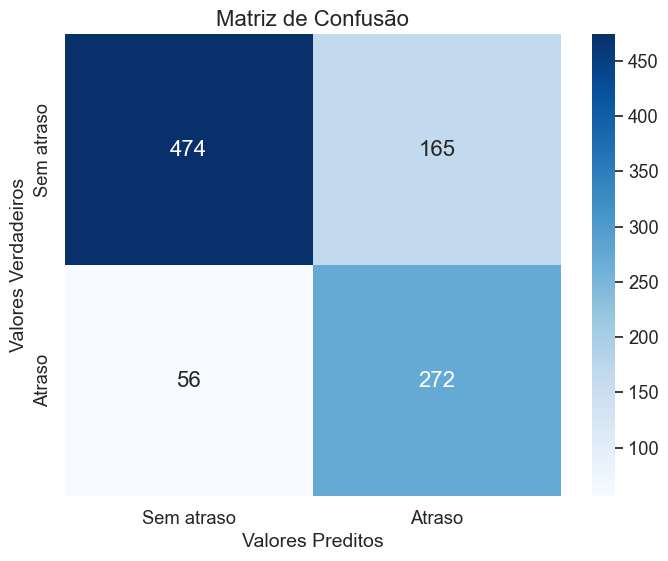

In [41]:
cm = confusion_matrix(y_test, predict_test)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Ajusta o tamanho da fonte
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16}, 
            xticklabels=['Sem atraso', 'Atraso'], 
            yticklabels=['Sem atraso', 'Atraso'])
plt.xlabel('Valores Preditos', fontsize=14)
plt.ylabel('Valores Verdadeiros', fontsize=14)
plt.title('Matriz de Confusão', fontsize=16)
plt.show()

In [47]:
encoder = OneHotEncoder()

encoded_data = encoder.fit_transform(X_train[columns_to_encoder])

encoded_feature_names = encoder.get_feature_names_out(input_features=columns_to_encoder)

# Convertendo a matriz esparsa para um array numpy
encoded_data_array = encoded_data.toarray()

# Criando o DataFrame com as features codificadas
encoded_df = pd.DataFrame(encoded_data_array, columns=encoded_feature_names)

# Removendo as colunas categóricas originais do DataFrame original
X_train_encoded = X_train.drop(columns=columns_to_encoder, axis=1)

# Concatenando os DataFrames
df_encoded = pd.concat([X_train_encoded, encoded_df], axis=1)

In [48]:
colunas = df_encoded.columns

In [49]:
feature_importances = best_model.named_steps['classifier'].feature_importances_

In [50]:
list_features = [(item, colunas[i]) for i, item in enumerate(feature_importances)]

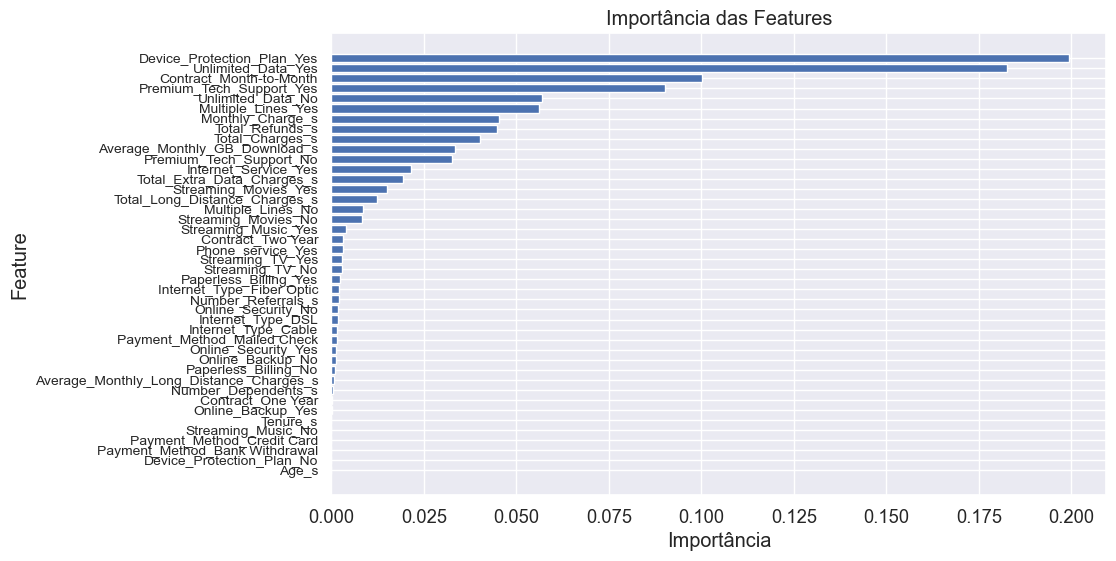

In [63]:
list_features.sort(reverse=True)

# Extrair as features e importâncias ordenadas
features = [f[1] for f in list_features]
importances = [f[0] for f in list_features]

# Plotar as importâncias das features
plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.title('Importância das Features')

# Aumentar o espaçamento no eixo y
plt.gca().invert_yaxis()
plt.gca().set_yticklabels(features, fontsize=10)
  # Ajuste o valor de 'pad' conforme necessário

plt.show()

In [64]:
list_features

[(0.19947816275633354, 'Device_Protection_Plan_Yes'),
 (0.18259430685010467, 'Unlimited_Data_Yes'),
 (0.10010246646746582, 'Contract_Month-to-Month'),
 (0.09010186196719754, 'Premium_Tech_Support_Yes'),
 (0.05679400272201964, 'Unlimited_Data_No'),
 (0.05623805511255664, 'Multiple_Lines_Yes'),
 (0.045389270725066044, 'Monthly_Charge_s'),
 (0.04466301257428908, 'Total_Refunds_s'),
 (0.04014155044984619, 'Total_Charges_s'),
 (0.033290429887692596, 'Average_Monthly_GB_Download_s'),
 (0.032702340372228904, 'Premium_Tech_Support_No'),
 (0.021487730127110527, 'Internet_Service_Yes'),
 (0.01932604434762622, 'Total_Extra_Data_Charges_s'),
 (0.015099108987107465, 'Streaming_Movies_Yes'),
 (0.012199793856709346, 'Total_Long_Distance_Charges_s'),
 (0.008646829619527738, 'Multiple_Lines_No'),
 (0.008181116150462499, 'Streaming_Movies_No'),
 (0.004065596401116788, 'Streaming_Music_Yes'),
 (0.003039539200246147, 'Contract_Two Year'),
 (0.0030188876511468713, 'Phone_service_Yes'),
 (0.0029961164196977